# Setup


In [ ]:
'''
install dependencies
'''

!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
!pip install firebase
!pip install python_jwt 
!pip install gcloud
!pip install sseclient
!pip install pycrypto
!pip install requests-toolbelt

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 25kB/s 
     |████████████████████████████████| 4.1MB 12.8MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101
     |████████████████████████████████| 276kB 4.7MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=16c345aebc02cb66e181df294c8e939fc5553029e943851b57a86d3c1ab5f9b3
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-b

In [ ]:
'''
importing libraries
'''

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# common libraries
import numpy as np
import cv2
import random
import os
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2.data import MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.checkpoint import Checkpointer
from detectron2.modeling import build_model
from google.colab import drive

# Volume calculation
from fastai import *
import cv2
import json
from fastai.vision import *
from skimage import data
from skimage import filters
from skimage import exposure
from skimage import measure
from skimage import segmentation
from skimage import morphology
from skimage import color
from skimage.viewer import ImageViewer
from skimage.io import imread
from datetime import date
from datetime import datetime
import pytz

from firebase import firebase
from termcolor import colored
from PIL import Image
from google.colab import drive
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Viewer requires Qt


In [ ]:
'''
importing data
'''

# mounting google drive to be accessed by Colab
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Preparation of data

In [ ]:
'''
setup of datasets
'''

# Training dataset registering
register_coco_instances("train_dataset_b", {}, "/content/drive/My Drive/oil_tank/train/train_coco_4.json", "/content/drive/My Drive/oil_tank/train")

# Validation dataset registering
register_coco_instances("valid_dataset_b", {}, "/content/drive/My Drive/oil_tank/valid/valid_coco_4.json", "/content/drive/My Drive/oil_tank/valid")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to delete
# cfg.OUTPUT_DIR = "content/drive/My Drive/oil_tank/model"

'''
configuring model for transfer learning
'''
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
cfg.DATASETS.TRAIN = ("train_dataset_b",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")  
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  
cfg.SOLVER.MAX_ITER = 5000    
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)

[07/19 11:53:58 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.


# Execution

In [ ]:
# initiate training
trainer.train()

[07/19 11:54:00 d2.engine.train_loop]: Starting training from iteration 0
[07/19 11:54:18 d2.utils.events]:  eta: 1:12:57  iter: 19  total_loss: 1.187  loss_cls: 0.739  loss_box_reg: 0.392  loss_rpn_cls: 0.031  loss_rpn_loc: 0.013  time: 0.8589  data_time: 0.0094  lr: 0.000005  max_mem: 1831M
[07/19 11:54:36 d2.utils.events]:  eta: 1:13:56  iter: 39  total_loss: 1.227  loss_cls: 0.700  loss_box_reg: 0.515  loss_rpn_cls: 0.022  loss_rpn_loc: 0.007  time: 0.8906  data_time: 0.0003  lr: 0.000010  max_mem: 1831M
[07/19 11:54:55 d2.utils.events]:  eta: 1:15:36  iter: 59  total_loss: 1.175  loss_cls: 0.621  loss_box_reg: 0.486  loss_rpn_cls: 0.026  loss_rpn_loc: 0.008  time: 0.9134  data_time: 0.0003  lr: 0.000015  max_mem: 1831M
[07/19 11:55:13 d2.utils.events]:  eta: 1:14:19  iter: 79  total_loss: 1.129  loss_cls: 0.526  loss_box_reg: 0.475  loss_rpn_cls: 0.031  loss_rpn_loc: 0.010  time: 0.9004  data_time: 0.0003  lr: 0.000020  max_mem: 1831M
[07/19 11:55:30 d2.utils.events]:  eta: 1:13:5

In [ ]:
'''
Evaluator to check accuracy of detection against validation dataset
'''

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("valid_dataset_b", )
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("valid_dataset_b", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "valid_dataset_b")
inference_on_dataset(trainer.model, val_loader, evaluator)

[07/19 13:08:04 d2.data.datasets.coco]: Loaded 131 images in COCO format from /content/drive/My Drive/oil_tank/valid/valid_coco_4.json
[07/19 13:08:04 d2.data.build]: Distribution of instances among all 1 categories:
|   category    | #instances   |
|:-------------:|:-------------|
| Floating He.. | 129          |
|               |              |
[07/19 13:08:04 d2.data.common]: Serializing 131 elements to byte tensors and concatenating them all ...
[07/19 13:08:04 d2.data.common]: Serialized dataset takes 0.02 MiB
[07/19 13:08:04 d2.data.dataset_mapper]: Augmentations used in training: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/19 13:08:04 d2.evaluation.evaluator]: Start inference on 131 images
[07/19 13:08:07 d2.evaluation.evaluator]: Inference done 11/131. 0.2530 s / img. ETA=0:00:30
[07/19 13:08:12 d2.evaluation.evaluator]: Inference done 31/131. 0.2532 s / img. ETA=0:00:25
[07/19 13:08:17 d2.evaluation.evaluator]: Inference done 51

OrderedDict([('bbox',
              {'AP': 86.03165284321015,
               'AP50': 99.00691468668688,
               'AP75': 99.00691468668688,
               'APl': 96.76867686768676,
               'APm': 87.68428196934585,
               'APs': 56.70765266448713})])

#Manual testing 

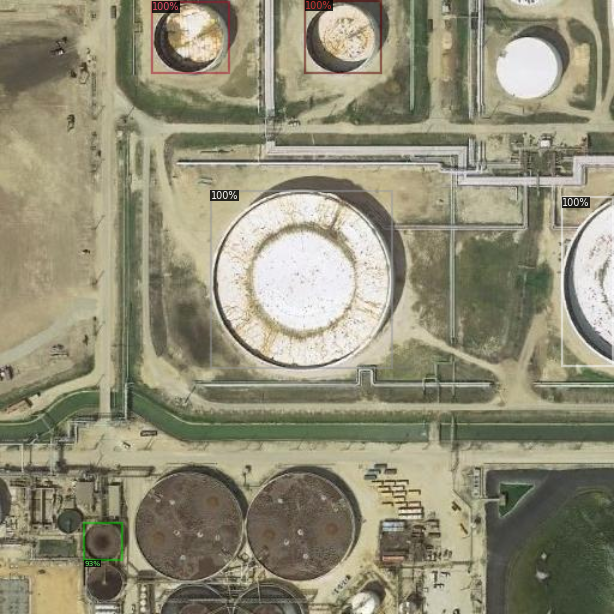

In [ ]:
'''
manually checking output
'''

test_image = "/content/drive/My Drive/oil_tank/valid/01_6_6.jpg"
im = cv2.imread(test_image)
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

# Volume calculation from shadows


In [ ]:
"""
Functions to use
"""

# image_to_eval =  "/content/drive/My Drive/oil_tank/images/full_tank.png"

'''
date and time
'''
today = date.today()
# dd/mm/YY
date_today = today.strftime("%d/%m/%Y")

SGT = pytz.timezone('Asia/Singapore')
date_time_today = datetime.now(SGT).strftime('%d/%m %H:%M:%S')


def capacity_of_tank(image):
    # image = Image.open(image_path)

    # colour spaces and filtering
    hsv = color.rgb2hsv(image)
    hsv_space = hsv[:,:,2]
    lab = color.rgb2lab(image)
    lab_space_1 = lab[:,:,0]
    lab_space_2 = lab[:,:,2]
    enhanced_image = -(lab_space_1 + lab_space_2) / (hsv_space + 1)

    # filter 
    t1 = filters.threshold_minimum(enhanced_image)
    t2 = filters.threshold_mean(enhanced_image)
    filtered_image = (enhanced_image > (0.6 * t1 + 0.4 * t2))
    outlined = measure.label(filtered_image)
    cleaned_image = morphology.remove_small_objects(outlined, 80)

    # handling edge tanks
    dimensions = image.size
    length = dimensions[0]
    breadth = dimensions[1]
    if ((length / breadth) > 1.25 or (length / breadth) < 0.75):
        return -10

    # tank volume calculation
    cleaned_image_regions = measure.regionprops(cleaned_image)
    shadow_max = -1
    shadow_min = -1
    arr = []
    for r in cleaned_image_regions:
        if (r.area > 80):
            arr.append(r.area)
    if (len(arr) <= 1):
        return -1
    # elif (len(arr) > 2):
    #     return -10
    else: 
        if (arr[0] > arr[1]):
            shadow_max = arr[0]
            shadow_min = arr[1]
        else:
            shadow_max = arr[1]
            shadow_min = arr[0]

        return 1 - (shadow_min / shadow_max)


def check_mean(arr):
    total = 0
    count = 0
    for value in arr:
        if value > 0:
            total += value
            count += 1
            
    return (total / count)


def crop_tank(path, bbox):
    img = Image.open(path)

    # cropping boundaries
    x_min =  bbox[0] - 10
    y_max = bbox[1] + bbox[3] + 10
    x_max = bbox[0] + bbox[2] + 10
    y_min = bbox[1] - 10

    # crop image, boundary tuple
    boundary = (x_min, y_min, x_max, y_max)
    image_file = img.crop(boundary)

    return image_file


def overall_capacity(original_labels, prediction_labels, path_to_dir):
    
    # opening files
    original_labels_data = open(original_labels)
    prediction_labels_data = open(prediction_labels)

    # loading data
    original_label_json = json.load(original_labels_data)
    prediction_labels_json = json.load(prediction_labels_data)

    # create list for recording capacity
    list = []

    # counters
    counter_total = 0
    counter_success = 0
    counter_1_shadow = 0
    counter_edge = 0

    # interpreting volume on each image
    for image in prediction_labels_json:
        counter_total += 1

        # extracting info from json files
        id = image["image_id"]
        bbox = image["bbox"]
        image_file_name = original_label_json["images"][id]["file_name"]
        image_path = path_to_dir + image_file_name

        # extracting out the subimage
        subimage = crop_tank(image_path, bbox)
        
        # checking capacity
        cap = capacity_of_tank(subimage)

        # TO REMOVE #
        list.append(cap)

        # updating time
        date_time_today = datetime.now(SGT).strftime('%d/%m %H:%M:%S')

        # print result
        if (cap > 0): 
            print(format(counter_total) + colored(' [', 'green') + colored(date_time_today, 'green') + colored(']: ', 'green') + "capacity of tank: " f"{cap:.5f}")
            counter_success += 1
        elif (cap == -1):
            print(format(counter_total) + colored(' [', 'red') + colored(date_time_today, 'red') + colored(']: ', 'red') + "error: only 1 shadow detected")
            counter_1_shadow += 1
        else:
            counter_edge += 1

    print("\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")
    print(colored(colored(' [', 'green') + colored(date_time_today, 'green') + colored(']: ', 'green') + "compiling data...\n", 'green'))
    print("|  Total tanks detected  |  Valid tanks  |  " + colored("Invalid tanks", 'red') + "  |  " + colored("Mean volume of tanks", 'green') + "  |")
    print("| :--------------------: | :-----------: | :-------------: | :---------------------:|")
    print("|          " + format(counter_total) + "           |        " + format(counter_success + counter_1_shadow) + "    |       " + format(counter_edge) + "        |          " + f"{(check_mean(list)):.4f}" + "        |")
    print("\n\n\n")

    return check_mean(list)


def send_to_site(value):
    
    '''
    date and time
    '''

    date_time_today = datetime.now(SGT).strftime('%d/%m %H:%M:%S')


    '''
    sending data
    '''

    # getting firebase connection
    FB_connection = firebase.FirebaseApplication('https://black-gold-fa916.firebaseio.com/', None)

    info_to_upload = {
        'date' : date_today,
        'value' : value
    }

    result = FB_connection.post('/tank_capacity_china', info_to_upload)

    for data in result:
        if data is not None:
            print (colored('[', 'green') + colored(date_time_today, 'green') + colored(']: ', 'green') + colored('data sucessfully uploaded to the database', 'green'))
        else:
            print (colored('Error: Upload failed', 'red'))

    










orig_path = "/content/drive/My Drive/oil_tank/check_capacity/original_json.json"
pred_path = "/content/drive/My Drive/oil_tank/check_capacity/predictions_json.json"
dir_path = "/content/drive/My Drive/oil_tank/valid/"


value = overall_capacity(orig_path, pred_path, dir_path)

send_to_site(value)

1 [27/07 02:50:01]: error: only 1 shadow detected
2 [27/07 02:50:01]: error: only 1 shadow detected
3 [27/07 02:50:01]: capacity of tank: 0.19708
4 [27/07 02:50:01]: error: only 1 shadow detected
6 [27/07 02:50:01]: error: only 1 shadow detected
7 [27/07 02:50:01]: capacity of tank: 0.15929
8 [27/07 02:50:01]: error: only 1 shadow detected
9 [27/07 02:50:01]: error: only 1 shadow detected
10 [27/07 02:50:01]: capacity of tank: 0.83466
11 [27/07 02:50:01]: error: only 1 shadow detected
12 [27/07 02:50:01]: error: only 1 shadow detected


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?


13 [27/07 02:50:01]: error: only 1 shadow detected
14 [27/07 02:50:01]: error: only 1 shadow detected
15 [27/07 02:50:01]: error: only 1 shadow detected
16 [27/07 02:50:01]: capacity of tank: 0.19802
17 [27/07 02:50:01]: error: only 1 shadow detected
18 [27/07 02:50:01]: error: only 1 shadow detected
19 [27/07 02:50:01]: capacity of tank: 0.39685
20 [27/07 02:50:01]: capacity of tank: 0.37899
22 [27/07 02:50:01]: capacity of tank: 0.46452
23 [27/07 02:50:01]: error: only 1 shadow detected
24 [27/07 02:50:01]: error: only 1 shadow detected
25 [27/07 02:50:01]: error: only 1 shadow detected
28 [27/07 02:50:01]: capacity of tank: 0.19722
30 [27/07 02:50:01]: error: only 1 shadow detected
31 [27/07 02:50:01]: error: only 1 shadow detected
32 [27/07 02:50:01]: error: only 1 shadow detected
33 [27/07 02:50:01]: capacity of tank: 0.04981
34 [27/07 02:50:01]: error: only 1 shadow detected
35 [27/07 02:50:01]: capacity of tank: 0.22146
36 [27/07 02:50:01]: capacity of tank: 0.85614
37 [27/07 02

# Test accuracy of volume calculation 

In [ ]:
def check_calc(test, model):

    test_data = open(test)
    model_data = open(model)

    # loading data
    original_label_json = json.load(test_data)
    prediction_labels_json = json.load(model_data)

    # create list of percentages
    list = []
    counter = 0
    # process data
    for image in original_label_json:
        counter += 1

        # extracting out data from test file
        id = image["tank_id"]
        volume_test = image["tank_volume"]

        # extrating data from model file
        volume_model = prediction_labels_json[id]["tank_volume"]

        # calculation
        diff = abs(volume_test - volume_model)
        list[counter] = (diff / volume_test) * 100
        
    sum = 0
    for entry in list:
        sum += entry

    return (sum / counter)





test_json_1 =  "/content/drive/My Drive/oil_tank/check_capacity/to-test_json.json"
model_json_2 = "/content/drive/My Drive/oil_tank/check_capacity/model_json.json"

check_calc(data_1, data_2)